<div><img style="float: right; width: 120px; vertical-align:middle" src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/EU_Informatica/ETSI%20SIST_INFORM_COLOR.png" alt="ETSISI logo" />


# Problemas de clasificación, regresión y sus métricas<a id="top"></a>

<i><small>Autor: Alberto Díaz Álvarez<br>Última actualización: 2023-03-05</small></i></div>
                                                  

***

## Introducción

En un esquema de aprendizaje supervisado el objetivo es modelar de algún modo la relación entre las características medidas de los datos y alguna etiqueta o _label_ asociada a los datos de manera que, una vez determinado dicho modelo, este pueda ser usado para aplicar etiquetas a datos nuevos y desconocidos.

Esto se corresponde con dos tareas diferentes, tanto en la definición de la arquitectura como en la medida de su desempeño:

- **Tareas de clasificación**, donde las etiquetas con categorías discretas.
- **Tareas de regresión**, también denominadas de ajuste, donde las etiquetas son cantidades continuas.

## Objetivos

Vamos a plantear soluciones a dos tipos de problemas diferentes, uno de clasificación y otro de regresión. Para ellos, definiremos además una serie de métricas para medir el desempeño de estas.

## Bibliotecas y configuración

A continuación importaremos las bibliotecas que se utilizarán a lo largo del _notebook_.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn.metrics
import tensorflow as tf

Si salen algunos _warning_ es porque `tensorflow` es así. Seguramente sea una compilación genérica y requiera de una compilación específica para que desaparezcan. Afortunadamente, no suele pasar nada porque salgan estos warning, sobreviviremos.

Configuraremos también algunos parámetros para adecuar la presentación gráfica.

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({"axes.grid" : False})
plt.rcParams.update({'figure.figsize': (16, 9),'figure.dpi': 64})

***

## Tareas de clasificación

Como hemos indicado en la introducción, las tareas de clasificación son predecir etiquetas discretas. La verdad es que ya hemos desarrollado esta tarea antes, hemos clasificado ejemplos de entrada en una de las 10 clases de salida: los diez dígitos del 0 al 9.

En este caso trataremos de resolver un problema de clasificación binaria (es decir, pertenecer o no a una clase) con un modelo sencillo para ilustrar el problema. Para ello nos aprovecharemos de la función `make_classification` de la biblioteca `scikit learn`.

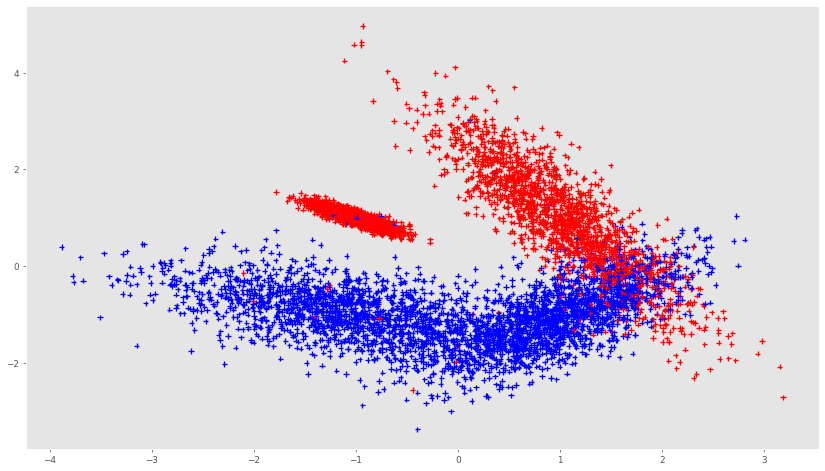

In [3]:
X, Y = sklearn.datasets.make_classification(
    n_samples=7000,
    n_features=2,
    n_redundant=0,
    n_classes=2
)
plt.scatter(X[:,0], X[:,1], marker="+", c=Y, cmap='bwr');

El conjunto de datos está compuesto de 7000 ejemplos de dos características y dos clases (0 o 1). Visualmente, vemos que estas dos clases están relativamente bien diferenciadas.

Vamos a extraer 1000 ejemplos para el conjunto de test y el resto como conjunto de entrenamiento.

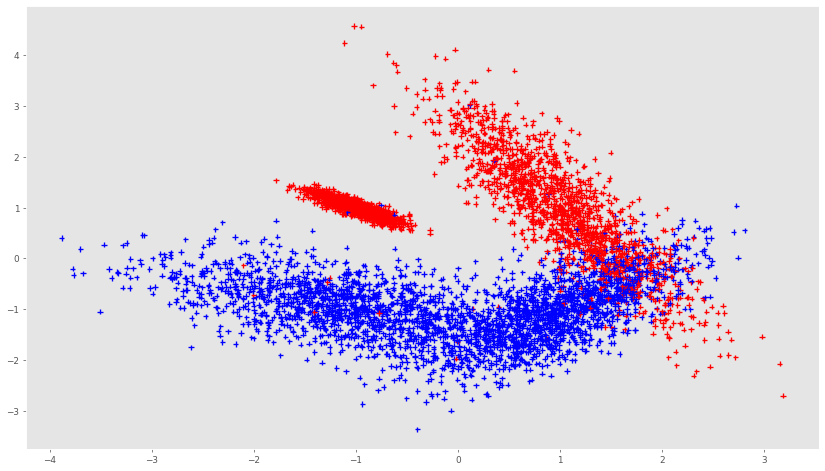

In [4]:
x_train, y_train = X[:-1000,:], Y[:-1000]
x_test, y_test = X[-1000:,:], Y[-1000:]
plt.scatter(x_train[:,0], x_train[:,1], marker="+", c=y_train, cmap='bwr');

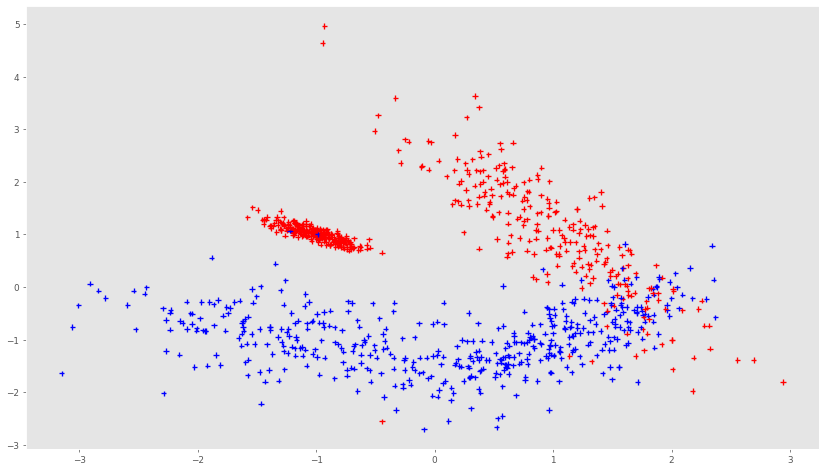

In [5]:
plt.scatter(x_test[:,0], x_test[:,1], marker="+", c=y_test, cmap='bwr');

### Modelo para clasificar datos

Ahora crearemos un modelo que sea capaz de clasificar valores que provengan de esta distribución:

In [6]:
model = tf.keras.models.Sequential([
    # La primera capa del modelo toma entradas de 28x28 y las "aplana"
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    # La salida la cambiamos a 10 neuronas y una función de activación softmax
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


Ahora entrenemos el modelo:

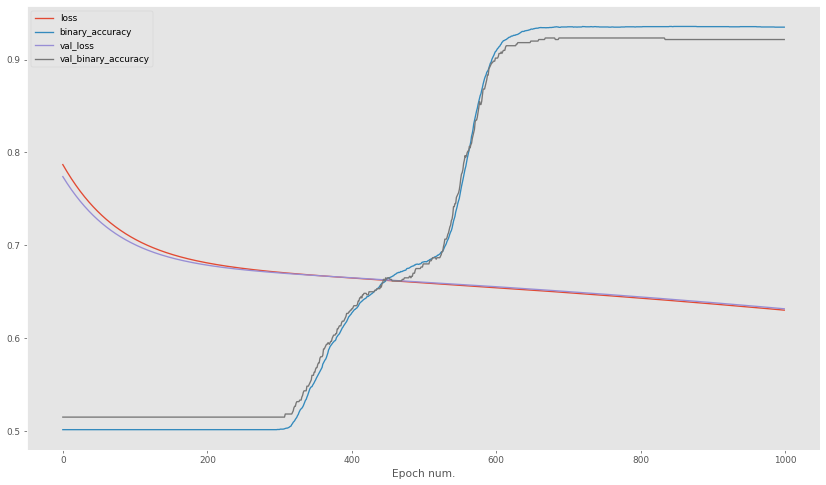

In [7]:
history = model.fit(x_train, y_train, batch_size=len(x_train), epochs=1000, validation_split=0.1, verbose=0)
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch num.')
plt.show()

Parece que más o menos aprende bien, así que nos quedaremos con este modelo. Vamos a hacer un recorrido sobre algunas de las diferentes métricas que existen para evaluar un modelo de clasificación. Para ello, extraeremos las predicciones de nuestro modelo sobre el conjunto de test.

In [8]:
ŷ_test = (model.predict(x_test) > 0.5).astype(int)[:,0]
print(ŷ_test)

32/32 [==============================] - 0s 677us/step
[1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1
 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 

### Matriz de confusión

La matriz de confusión no es una métrica como tal, sino que es una tabla que se utiliza en problemas de clasificación para evaluar dónde se cometieron errores en el modelo. Se utiliza para problemas de clasificación en los que la salida puede ser de dos o más tipos de clases, aunque aquí la explicaremos para problemas de clasificación binaria (dos clases).

La idea es que las filas representan las clases reales que deberían haber sido los resultados, mientras que las columnas representan las predicciones que hemos hecho. Utilizando esta tabla es fácil identificar qué predicciones son erróneas.

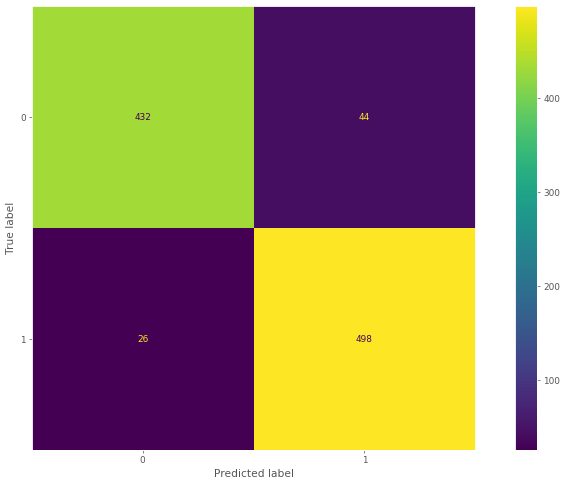

In [9]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, ŷ_test)
plt.show()

Prácticamente todas las medidas de rendimiento se basan en los valores de esta matriz. Antes de explicar estas métricas, es útil conocer los nombres por los que se conocen a los valores de acierto y fallo:

1. **Verdaderos positivos** (TP, de _true positives_): Aquellos casos donde la clase real y la clase que predice el modelo son verdaderas. Por ejemplo, el caso de que una persona tiene cáncer (`true`) y el modelo clasifica su caso como cáncer (`true`).
1. **Verdaderos negativos** (TN, de _true negatives_): Aquellos casos donde la clase real y la clase que predice el modelo son falsas. Por ejemplo, el caso de que una persona **no** tiene cáncer (`false`) y el modelo clasifica su caso como que **no** tiene cáncer (`false`).
1. **Falsos positivos** (FP, del inglés _false positives_): Aquellos casos donde la clase real es falsa, pero el modelo la predice como verdadera. Por ejemplo, una persona que **no** tiene cáncer, pero cuyo caso queda predicho por el modelo como que sí lo tiene.
1. **Falsos Negativos** (FN, del inglés _false negative_): Aquellos casos donde la clase real es verdadera, pero la que predice el modelo es falsa. Por ejemplo, el caso de una persona que sí tiene cáncer, pero para la que el modelo predice que no lo tiene.

Por supuesto, nosotros buscamos el escenario donde hay 0 falsos positivos y 0 falsos negativos, pero en la vida real no es así, ya que prácticamente ningún modelo será preciso al 100%. Por lo tanto, siempre habrá algún error asociado a cada modelo que utilicemos para predecir la clase real de la variable objetivo. Esto dará lugar a falsos positivos y falsos negativos, los cuales además estarán relacionados: cuando unos disminuyan otros aumentarán y viceversa.

Entonces, ¿cuáles son preferibles? pues depende del problema:

1. Minimizar los falsos negativos: Suele ser recomendable en los casos en los que pasar por alto un caso positivo supone un gran error. En el caso de la detección de cáncer anterior, es preferible cometer el error de falso positivo (el paciente es diagnosticado con cáncer cuando no lo tiene) en lugar de un false negativo (no es diagnosticado cuando sí lo tiene), porque en el segundo caso no se le realizaría ningún examen posterior.
1. Minimizar los falsos positivos: Suele ser preferible en el caso contrario al anterior. Por ejemplo, en un caso de detección de _spam_, suele ser preferible que un correo de _spam_ no sea detectado como tal; si en este caso minimizásemos los falsos negativos, aumentarían los falsos positivos y por tanto nuestro sistema podría eliminar correos genuinos.

### Exactitud (_accuracy_)

Se define como el número de predicciones correctas (verdaderos positivos y verdaderos negativos) respecto al total de predicciones realizadas:

$$
Acc = \frac{TP + TN}{TP + FP + TN + FN}
$$

Responde a la pregunta: **¿con qué frecuencia acierta el modelo?**

In [10]:
accuracy = np.sum(ŷ_test == y_test) / len(y_test)
print(f'Accuracy = {accuracy:.02}')

Accuracy = 0.93


Es una medida válida siempre y cuando el problema de clasificación esté bien balanceado. Sin embargo, en el momento que hay un claro sesgo hacia alguna de las clases, la medida se vuelve inútil. Por ejemplo, si estamos determinando si va a haber una fusión del núcleo en una central nuclear, nuestro modelo puede aprender a decir siempre que no y acertar el 99,9999% de los casos; desde el punto de vista de la exactitud, el modelo está muy bien, pero siendo objetivos no vale para nada.

### Precisión (_precision_)

Medida que indica qué proporción de predicciones positivas lo son realmente:

$$
Pre = \frac{TP}{TP + FP}
$$

Responde a la pregunta: **de los positivos que se han predecido, ¿qué porcentaje es realmente positivo?**

In [11]:
TP = np.sum((ŷ_test == 1) & (y_test == 1))
FP = np.sum((ŷ_test == 1) & (y_test == 0))
precision = TP / (TP + FP)
print(f'Precision = {precision:.02}')

Precision = 0.92


Sobre cuándo es útil o cuando no lo vemos en la siguiente medida.

### Recuperación (_recall_)

También se suele traducir como "sensibilidad", y es una medida que indica la proporción de verdaderos positivos fueron predichos como positivos por el modelo.

$$
Rec = \frac{TP}{TP + FN}
$$

Responde a la pregunta: **de todos los casos positivos, ¿qué porcentaje han sido predichos por el modelo?**

In [12]:
TP = np.sum((ŷ_test == 1) & (y_test == 1))
FN = np.sum((ŷ_test == 0) & (y_test == 1))
recall = TP / (TP + FN)
print(f'Recall = {recall:.02}')

Recall = 0.95


La precisión consiste precisamente en eso, ser preciso con los valores positivos, mientras que la recuperación consiste en recuperar todos los valores positivos. Por ejemplo, aunque sólo hayamos detectado un caso de cáncer, si lo hemos hecho correctamente, la **precisión** es del 100%; sin embargo, si marcamos todos los ejemplos como positivo en cáncer, la precisión no será nada buena, pero habremos conseguiro un 100% de **recuperación**.

Así que, básicamente, si queremos centrarnos más en minimizar los falsos negativos, nuestro objetivo sería conseguir una sensibilidad lo más cercana al 100% sin que la precisión fuera demasiado mala. Por otro lado, si quisiésemos centrarnos en minimizar los falsos positivos, entonces nuestro objetivo debería ser que la precisión fuera lo más cercana posible al 100%.

### Especificidad (_specificity_)

El lo opuesto a la sensibilidad. Mide qué proporción de valores realmente negativos son predichos como negativos:

$$
Spe = \frac{TN}{TN + FP}
$$

Responde a la pregunta: **¿cómo de bien predice el modelo los resultados negativos?**

In [13]:
TN = np.sum((ŷ_test == 0) & (y_test == 0))
FP = np.sum((ŷ_test == 1) & (y_test == 0))
specificity = TN / (TN + FP)
print(f'Specificity = {specificity:.02}')

Specificity = 0.91


Por ejemplo, supongamos que de 100 personas 5 tienen cáncer y nuestro modelo predice que todas tienen cáncer. Ya vimos que la recuperación era del 100%: todos los casos de cáncer son diagnosticados correctamente. Sin embargo, la epecificidad será del 0%, ya que no ha habido ningún falso negativo identificado correctamente.

### _F1 Score_

Generalmente las medidas de precisión y recuperación se suelen juntas para entender la calidad de una clasificación. El _F1 score_ es una métrica que representa a ambas, concretamente su media armónica, y se expresa como sigue:

$$
F1 = 2 \cdot \frac{Pre \cdot Rec}{Pre + Rec}
$$

Su valor estará en el intervalo $[0, 1]$, donde 0 indica que la precisión o la recuperación son 0 (malo) y 1 donde ambas son 1 (bueno).

In [14]:
f1_score = 2 * precision * recall / (precision + recall)
print(f'F1 Score = {f1_score:.02}')

F1 Score = 0.93


### Curvas ROC (_Receiver Operating Characteristic_) y AUC (_Area Under the Curve_)

La **curva ROC** es una medida de rendimiento para problemas de clasificación binaria que evalúa la capacidad de un modelo para distinguir entre dos clases. Muestra la tasa de verdaderos positivos ($Rec$) frente a la tasa de falsos positivos ($1 - Spe$) para diferentes umbrales de probabilidad.

Veamos la curva ROC con nuestros datos reales y predichos:

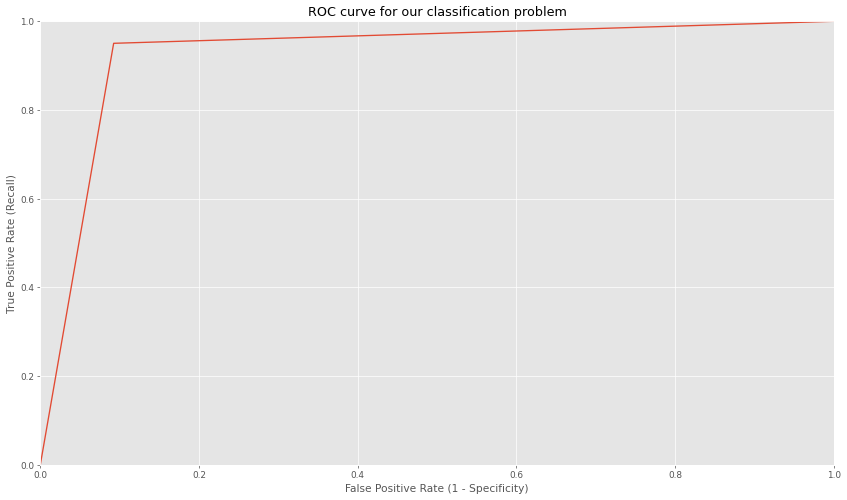

In [15]:
FP_rate, TP_rate, thresholds = sklearn.metrics.roc_curve(y_test, ŷ_test)
plt.plot(FP_rate, TP_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for our classification problem')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)

Esta curva es muy útil porque nos proporciona una forma de evaluar _recall_ y especificidad de un modelo de clasificación en diferentes umbrales de probabilidad. Un modelo con una curva ROC cercana a la esquina superior izquierda tiene una alta tasa de verdaderos positivos u una baja tasa de falsos positivos, lo que indica que es un buen modelo de clasificación. Por otro lado, un modelo con una curva ROC cercana a la diagonal tiene un rendimiento aleatorio.

La curva ROC también se utiliza para calcular el área bajo la curva ROC (AUC), que es una medida numérica del rendimiento del modelo de clasificación. El AUC oscila entre 0 y 1, donde un valor de 1 indica un modelo de clasificación perfecto y un valor de 0,5 indica un rendimiento aleatorio. Veamos cómo se calcula:

In [16]:
sklearn.metrics.roc_auc_score(y_test, ŷ_test)

0.9289723522996985

El AUC es muy útil como resumen numérico del rendimiento del clasificador, incluso cuando hay un gran desequilibrio de clases (a diferencia de la exactitud de la clasificación). Permite evaluar la capacidad de un modelo para distinguir entre dos clases y **comparar diferentes modelos de clasificación de manera objetiva**.

## Tareas de regresión

Las tareas de rergesión son aquellas que tratan de predecir una salida continua a partir de un conjunto de características de entrada. Son una técnica dentro del aprendizaje supervisado que trata de establecer una relación funcional entre las características de entrada y sus respectivas salidas.

Algunos ejemplos de este tipo de modelos puede ser la predicción de precios de viviendas, proyección de ventas o de ingresos futuros de clientes, etcétera.

En este caso vamos a crear un modelo sencillo que trate de resolver el problema del conjunto de datos _Boston Housing Price dataset_ al que podemos acceder directamente a través de `keras`. Las 13 características que definen cada uno de los ejemplos se describen en el sitio web [StatLib](http://lib.stat.cmu.edu/datasets/boston). Estas son, por orden:

- `CRIM`: Tasa de criminalidad per cápita por ciudad
- `ZN`: Proporción de suelo residencial para parcelas de más de 25K pies cuadrados
- `INDUS`: Proporción de acres comerciales no minoristas por ciudad
- `CHAS`: Variable ficticia del río Charles (= 1 si el tramo linda con el río; 0 en caso contrario)
- `NOX`: Concentración de óxidos nítricos (partes por 10 millones)
- `RM`: Número medio de habitaciones por vivienda
- `AGE`: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- `DIS`: Distancias ponderadas a cinco centros de empleo de Boston
- `RAD`: Índice de accesibilidad a autopistas radiales
- `TAX`: Tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
- `PTRATIO`: Ratio alumno-profesor por ciudad
- `B`: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
- `LSTAT`: % más bajo de la población
- `MEDV`: Valor medio de las viviendas ocupadas por sus propietarios en miles de $.

El valor a predecir (las salidas) serán los valores medios de las viviendas en miles de dolares

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

print(f'Training shape: {x_train.shape} input, {y_train.shape} output')
print(f'Test shape:     {x_test.shape} input, {y_test.shape} output')

57026/57026 [==============================] - 0s 0us/step
Training shape: (404, 13) input, (404,) output
Test shape:     (102, 13) input, (102,) output


Introducir los datos en crudo a una red sería bastante problemático, así que los adaptaremos. Como no es el objetvo de este notebook, no se detallará el porqué de las transformaciones, pero básicamente se normalizarán las características restando su media y dividiendo por su desviación típica. Es una técnica típica de normalización para que los valores estén centrados en 0 con desviación típica de 1:

In [18]:
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
x_test = (x_test - x_test.mean(axis=0)) / x_test.std(axis=0)

Veamos qué forma tiene la salida del conjunto de datos:

In [19]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

Vamos a crear por tanto un modelo cuya salida sea una única neurona (dado que vamos a predecir un único valor) y, aunque en muchos casos las salidas se suelen normalizar, en este caso la activación de la última neurona será lineal para no añadir complicación al modelo.

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


Hemos cambiado tanto el tipo de neurona de activación (ReLU) como el optimizador, simplemente para que se vea lo fácil que es cambiarlos. En realidad los cambios diferenciadores con un problema de clasificación están en la forma de calcular el loss, que ahora usaremos cálculos específicos para medir un error de ajuste, como puede ser el MAE o el MSE.

Entrenemos ahora el modelo y veamos cómo se comporta el proceso de entrenamiento:

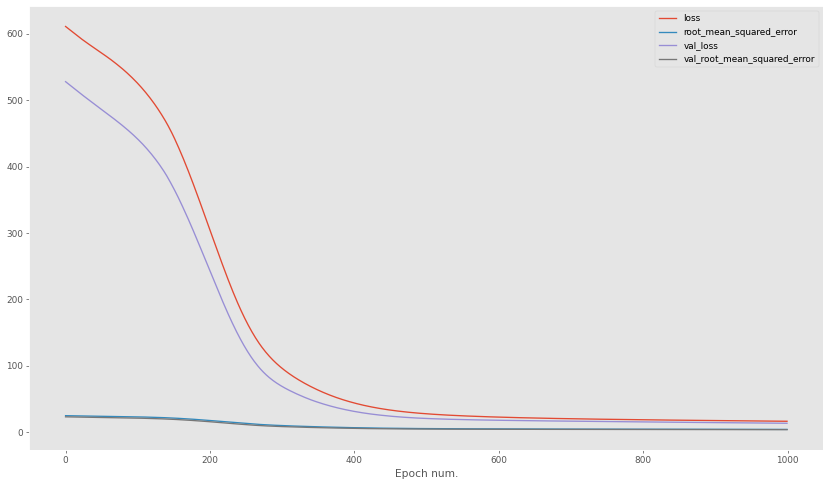

In [21]:
history = model.fit(x_train, y_train, batch_size=len(x_train), epochs=1000, validation_split=0.1, verbose=0)
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch num.')
plt.show()

Buen entrenamiento. Ahora vamos a predecir las salidas del conjunto de test y vamos a ponerlas frente a frente a frente con las reales, así podemos compararlas:

In [22]:
ŷ_test = model.predict(x_test)[:,0]
np.column_stack((y_test, ŷ_test))

4/4 [==============================] - 0s 1ms/step


array([[ 7.2       ,  7.84495306],
       [18.8       , 15.68894672],
       [19.        , 22.88394928],
       [27.        , 31.67142868],
       [22.2       , 26.97324753],
       [24.5       , 14.48896313],
       [31.2       , 25.9937973 ],
       [22.9       , 26.12380219],
       [20.5       , 16.96346664],
       [23.2       , 18.40837288],
       [18.6       , 14.045434  ],
       [14.5       , 18.23191261],
       [17.8       , 15.97794819],
       [50.        , 41.70941544],
       [20.8       , 16.61037064],
       [24.3       , 21.1701622 ],
       [24.2       , 26.37355232],
       [19.8       , 20.26106453],
       [19.1       , 17.02931595],
       [22.7       , 27.21761322],
       [12.        , 11.75146008],
       [10.2       , 14.07033062],
       [20.        , 21.38189697],
       [18.5       , 14.6182518 ],
       [20.9       , 25.70235443],
       [23.        , 19.89016914],
       [27.5       , 30.23611069],
       [30.1       , 33.48122406],
       [ 9.5       ,

A ojo parece que el modelo predice más o menos bien. Para ver cómo de bien, extraer conclusiones o, al menos, poder comparar entre modelos, existen diferentes métricas. Veamos algunas de las más conocidas:

### Error absoluto medio (MAE, de _Mean Absolute Error_)

Es la media de las diferencias absolutas entre las predicciones y los valores reales. Se define como:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Veamos la implementación en numpy:

In [23]:
mae = np.abs(y_test - ŷ_test).mean()
print(f'MAE = {mae}')

MAE = 3.6244812413757925


El MAE es útil porque da una idea de cuánto se desvían las predicciones del valor real en promedio.

### Error cuadrático medio (MSE, de _Mean Squared Error_)

Es la media de las diferencias al cuadrado entre las predicciones y los valores reales. Se define como:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Veamos la implementación en numpy:

In [24]:
mse = ((y_test - ŷ_test) ** 2).mean()
print(f'MSE = {mse}')

MSE = 22.838611963194317


Es útil dado que penaliza más fuertemente las grandes desviaciones de las predicciones del valor real.

### Raíz del error cuadrático medio (RMSE, de _Root Mean Squared Error_)

El RMSE es simplemente la raíz cuadrada del MSE. Se define como:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Veamos la implementación en numpy:

In [25]:
rmse = mse ** .5
print(f'RMSE = {rmse}')

RMSE = 4.7789760371019145


El RMSE se utiliza a menudo porque a las ventajas del MSE se le añade la de tener las mismas unidades que la variable objetivo, lo que lo hace fácilmente interpretable.

## Coeficiente de determinación ($R^2$ )

Es una medida de la proporción de la varianza en los valores objetivo que se puede explicar por las predicciones del modelo. Determina cómo de bien se predecirán los valores futuros con nuestro modelo. Se define como:

$$R^2(y, \hat{y}) = 1 - \frac{\sum_1^{n} (y_i - \hat{y}_i)^2}{\sum_1^{n}(y_i - \bar{y})^2}$$

Siendo$\bar{y}$ la media de los valores. Veamos su implementación en numpy.

In [26]:
r2 = 1 - ((y_test - ŷ_test) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
print(f'R² = {r2}')

R² = 0.7256420459974047


El $R^2$ varía entre 0 y 1, donde 1 significa que todas las variaciones se pueden explicar por el modelo y 0 significa que el modelo no explica ninguna variación.

## Conclusiones

Este notebook ha sido intenso, pero en él hemos visto las principales diferencias de los dos tipos de problema que nos encontraremos en problemas de aprendizaje profundo: clasificación y regresión. Los modelos desarrollados para éstos son muy parecidos, varían básicamente en la salida y su cálculo del error.

También, para la evaluación de estos modelos hemos presentado algunas medidas, unas específicas para clasificación y otras para regresión. Hay algunas que no hemos explicado (e.g. entropía cruzada) pero hemos preferido quedarnos en las más comunes. Una cosa buena es que prácticamente todos los frameworks incluyen estas implementaciones, seguramente mucho mejor de lo que las podamos implementar nosotros. Sin embargo, es muy importante es saber cómo estamos midiendo y qué significan esas mediciones.

---

## Referencias


[1] Guía para la creación de capas y modelos personalizados (<https://www.tensorflow.org/guide/keras/custom_layers_and_models>)

***

<div><img style="float: right; width: 120px; vertical-align:top" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" alt="Creative Commons by-nc-sa logo" />

[Volver al inicio](#top)

</div>